In [1]:
import seaborn as sns
import g

In [2]:
df_train = pd.read_csv("../data/application_train.csv")
df_test = pd.read_csv("../data/application_test.csv")

In [3]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
TARGET = df_train['TARGET']

def get_type(x):
    if isinstance(x[0], str):
        return 0
    if len( np.unique(x[:200])) <= 10:
        return 0
    else:
        return 1
    
def plot(x):
    global TARGET
    _type = get_type(x)
    if _type == 0:
        discrete_plot(x, TARGET)
    else:
        continuous_plot(x, TARGET)
    
def discrete_plot(x, y):
    temp = pd.concat((x, y), axis=1)
    temp['value'] = 1
    temp.groupby(list(temp.columns)[:2]).sum().unstack().plot(kind='bar', dropna=True)
    print(temp.groupby([temp.columns[0]])['TARGET'].mean())
    

def continuous_plot(x, y):
    x = x.dropna()
    sns.distplot(x.loc[y==0])
    sns.distplot(x.loc[y==1])


In [46]:
for i in df_train.columns[:11]:
    print(get_types(df_train[i]))
        

1
0
0
0
0
0
0
1
1
1
1


/home/ray/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


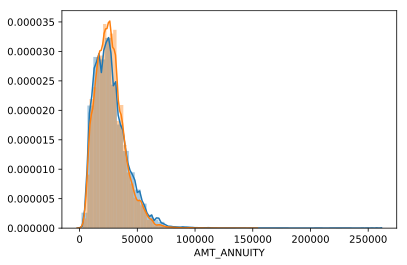

In [68]:
plot(df_train.iloc[:, 9])
